<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/fastai/02_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *


In [ ]:
path = Path('/content/BIWI_HEAD_POSE')
path = untar_data(URLs.BIWI_HEAD_POSE,data=path)

In [ ]:
path.ls()

(#50) [Path('/content/BIWI_HEAD_POSE/biwi_head_pose/18.obj'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/20'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/io_sample.cpp'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/readme.txt'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/05.obj'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/13.obj'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/19'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/24.obj'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/10'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/22.obj')...]

In [ ]:
(path/'01').ls()

(#1000) [Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00212_rgb.jpg'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00381_rgb.jpg'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00226_rgb.jpg'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00465_rgb.jpg'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00346_pose.txt'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00171_rgb.jpg'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00285_pose.txt'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00215_pose.txt'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00411_rgb.jpg'),Path('/content/BIWI_HEAD_POSE/biwi_head_pose/01/frame_00351_rgb.jpg')...]

In [ ]:
img_files = get_image_files(path)
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')
img2pose(img_files[0])

Path('/content/BIWI_HEAD_POSE/biwi_head_pose/20/frame_00212_pose.txt')

In [ ]:
im = PILImage.create(img_files[0])
im.shape

(480, 640)

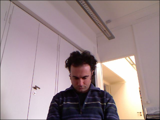

In [ ]:
im.to_thumb(160)

In [ ]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [ ]:
get_ctr(img_files[0])

tensor([343.4057, 309.3437])

In [ ]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms=[*aug_transforms(size=(240,320)),
                Normalize.from_stats(*imagenet_stats)]
)

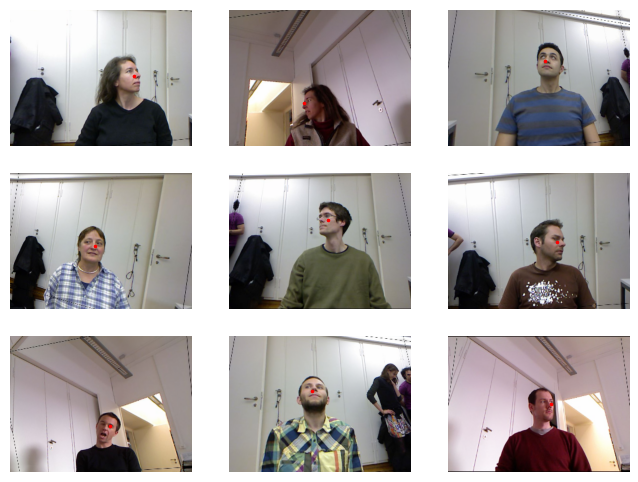

In [ ]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(8,6))

In [ ]:
learn = vision_learner(dls, resnet18, y_range=(-1,1))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.5MB/s]


SuggestedLRs(valley=0.002511886414140463)

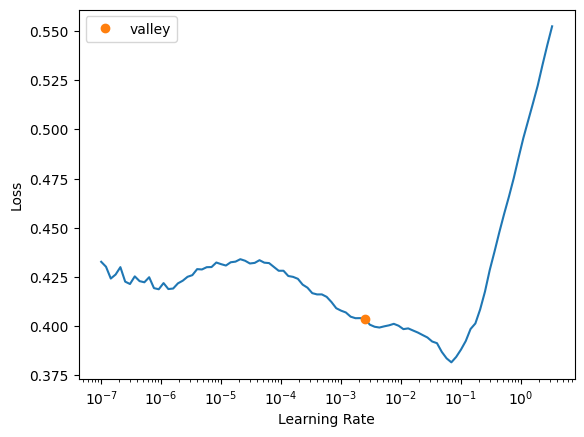

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(1, 5e-3)

epoch,train_loss,valid_loss,time
0,0.053029,0.006824,01:36


epoch,train_loss,valid_loss,time
0,0.003547,0.000455,01:45


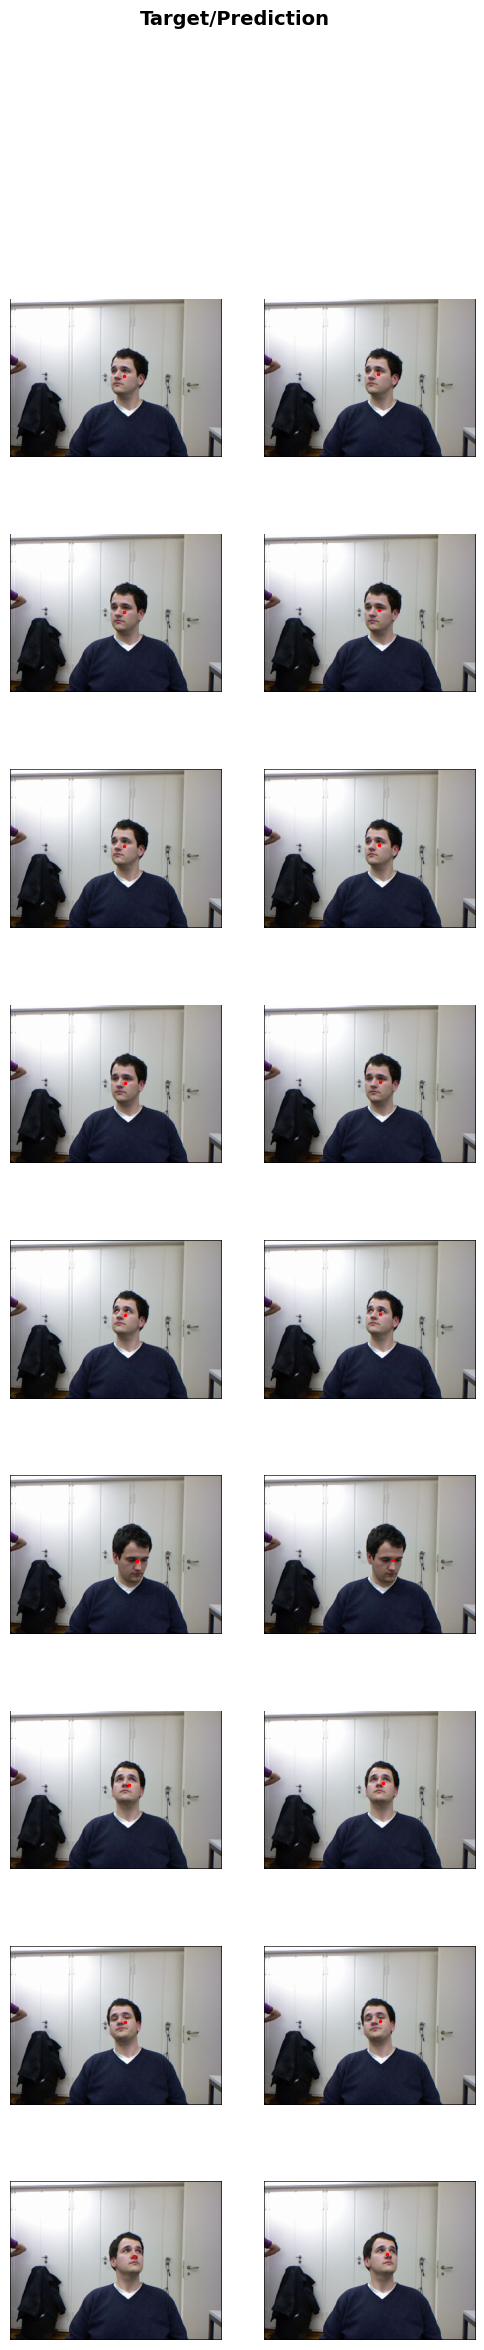

In [ ]:
learn.show_results()